In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
labels = df.label

In [7]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df["text"],labels,test_size = 0.2, random_state = 20)

In [10]:
x_train.head()

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
Name: text, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [12]:
# initialize a Tfidfvectorizer
vector = TfidfVectorizer(stop_words = 'english',max_df=0.7)

In [13]:
# fit and transform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [14]:
#initialize a PassiveAggresiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [15]:
#prediction the test dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.97      0.95       648
        REAL       0.96      0.94      0.95       619

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267



In [17]:
score = accuracy_score(y_test,y_pred)

In [18]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 95.19%


In [19]:
#Confusion metrics
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[627,  21],
       [ 40, 579]], dtype=int64)

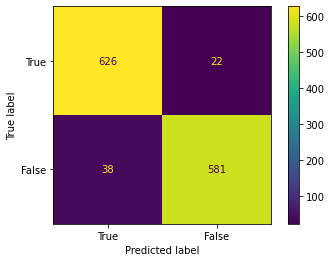

In [26]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[True, False])
  
cm_display.plot()
plt.show()

In [20]:
#save model
import pickle
filename = 'finalized_model.pk1'
pickle.dump(pac,open(filename,'wb'))

In [21]:
#save vectorizer
filename = 'vectorizer.pk1'
pickle.dump(vector,open(filename,'wb'))